In [1]:
import experiment_framework as ef
from pyexpat import model
import networkx as nx
import matplotlib.pyplot as plt
import copy
import numpy as np
import pickle

In [2]:
# Load the graph from the file
save_path = '/Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/email_eu_core_graph.gpickle'
try:
    with open(save_path, 'rb') as f:
        G = pickle.load(f)
    print(f"Graph loaded from {save_path}")
except Exception as e:
    print(f"An error occurred while loading the graph: {e}")

Graph loaded from /Users/huberyhu/Desktop/SURP/im_deinfluence/network_data/email_eu_core_graph.gpickle


In [3]:
model = ef.run_influence_cascade(G, num_influencers=50, steps=3, selection_method='random')

# Evaluate the influence and deinfluence
num_influenced = model.evaluate_influence()
num_deinfluenced = model.evaluate_deinfluence()
num_susceptible = model.evaluate_susceptible()

# Create a deep copy of the model
model_fixed_influencers = copy.deepcopy(model)

# Evaluate the influence and deinfluence
num_influenced = model_fixed_influencers.evaluate_influence()
num_deinfluenced = model_fixed_influencers.evaluate_deinfluence()
num_susceptible = model_fixed_influencers.evaluate_susceptible()

print(f"Number of influenced nodes: {num_influenced}")
print(f"Number of deinfluenced nodes: {num_deinfluenced}")
print(f"Number of susceptible nodes: {num_susceptible}")
print('influencer', model.selected_influencers)

Number of influenced nodes: 915
Number of deinfluenced nodes: 0
Number of susceptible nodes: 90
influencer {512, 898, 390, 6, 518, 10, 779, 401, 786, 150, 919, 155, 672, 674, 35, 680, 681, 812, 45, 49, 562, 948, 565, 949, 186, 827, 318, 192, 586, 203, 970, 462, 335, 79, 212, 981, 598, 471, 982, 596, 603, 865, 738, 866, 999, 876, 877, 498, 118, 892}


In [4]:
# Run simulation for different values of k
budget_list = list(range(0, 501, 5))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(0, {'Random': set(), 'Degree': set()}), (5, {'Random': set(), 'Degree': set()}), (10, {'Random': {794}, 'Degree': set()}), (15, {'Random': {401, 650, 743}, 'Degree': set()}), (20, {'Random': {12, 717, 886}, 'Degree': set()}), (25, {'Random': {740, 456, 524, 175, 253, 511}, 'Degree': {160}}), (30, {'Random': {10, 84}, 'Degree': {160}}), (35, {'Random': {833, 519, 334, 815, 537, 477}, 'Degree': {160}}), (40, {'Random': {838, 969, 589, 494, 657, 881, 630, 573}, 'Degree': {160}}), (45, {'Random': {42, 124, 668, 509, 543}, 'Degree': {160, 121}}), (50, {'Random': {801, 99, 677, 586, 18, 22, 634, 602, 794, 446}, 'Degree': {160, 121}}), (55, {'Random': {65, 196, 521, 883, 184, 731, 380}, 'Degree': {160, 121}}), (60, {'Random': {321, 738, 260, 73, 654, 239, 784, 819, 500, 665, 923}, 'Degree': {160, 121}}), (65, {'Random': {866, 357, 363, 107, 845, 535, 569, 730}, 'Degree': {160, 121, 107}}), (70, {'Random': {34, 291, 100, 645, 903, 488, 489, 202, 396, 306, 632, 346, 764}, 'Degree': {160, 121,

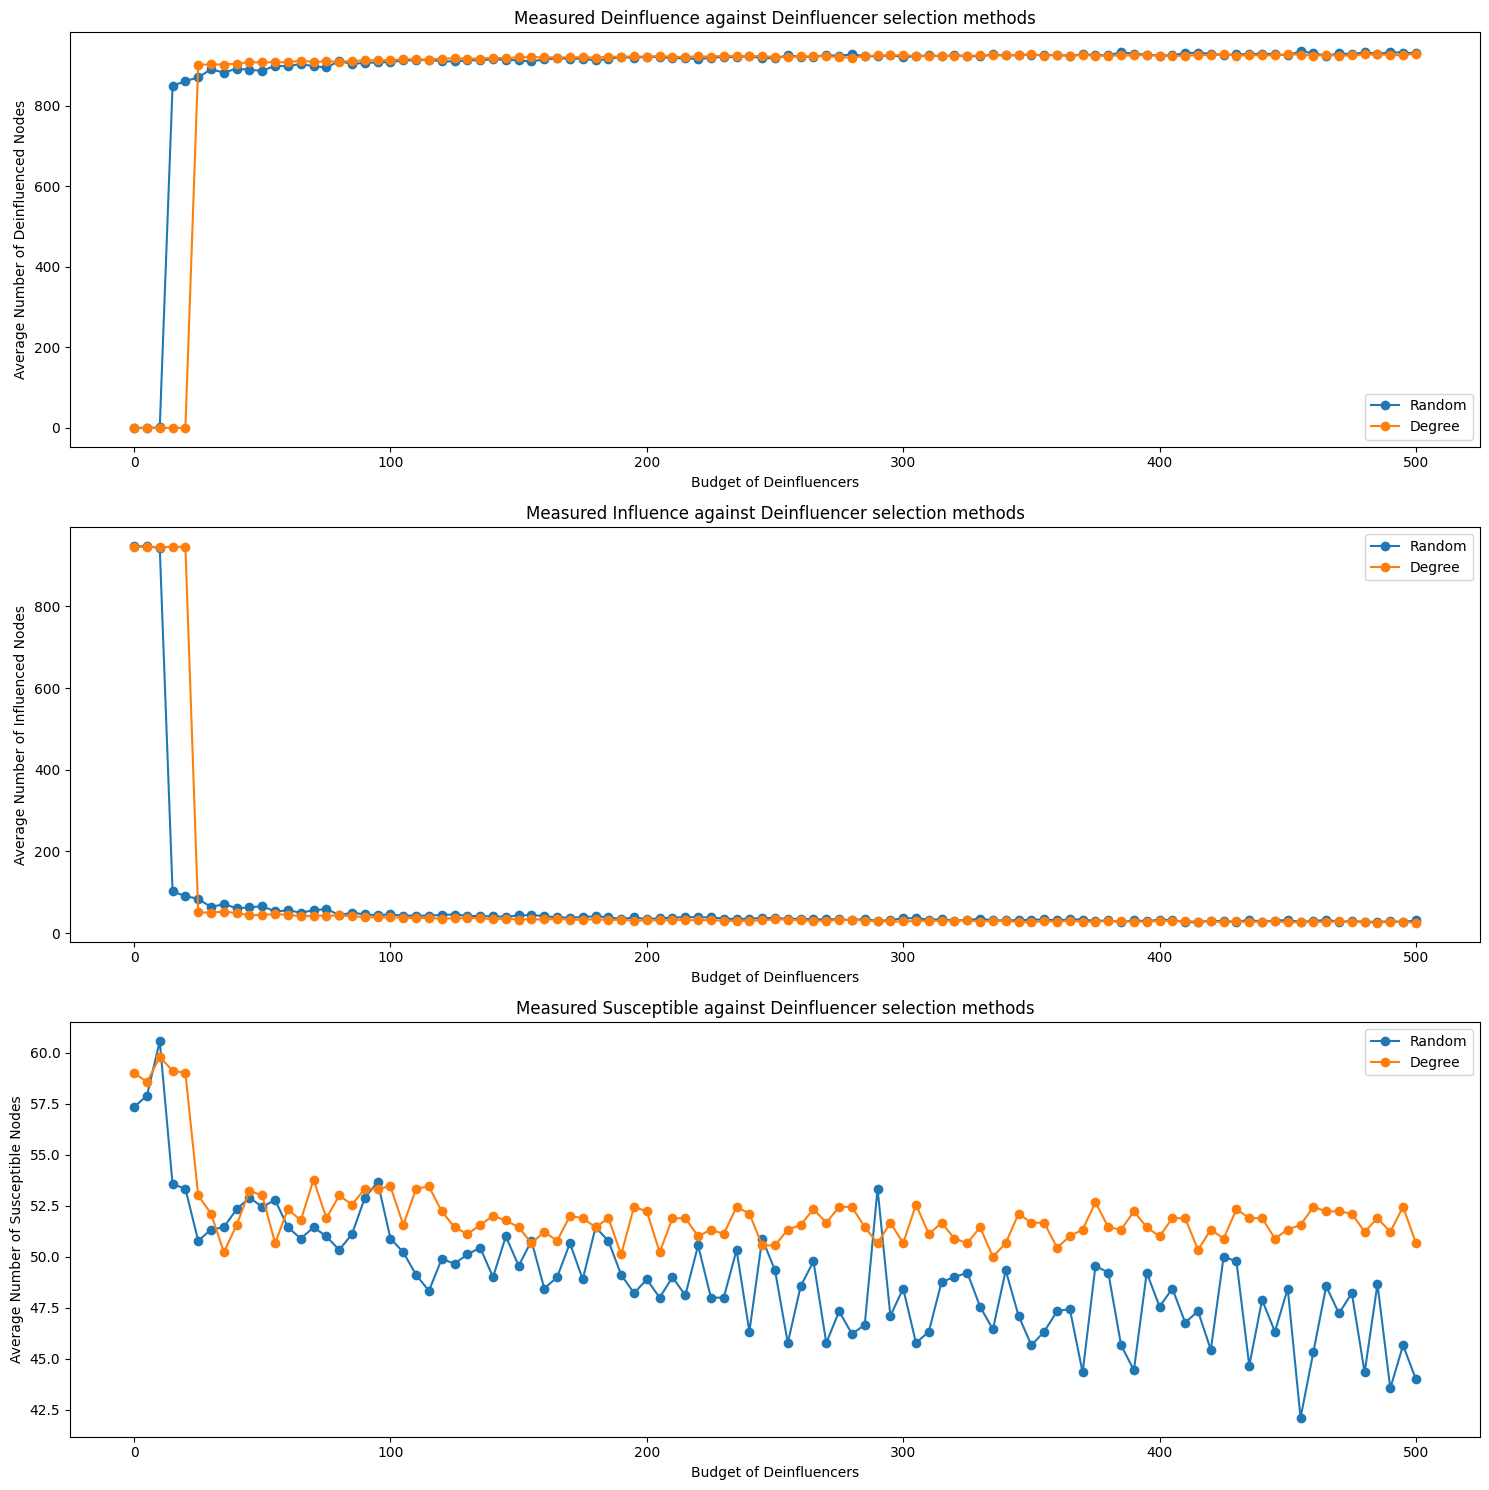

In [5]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()

In [6]:
# Run simulation for different values of k
budget_list = list(range(0, 501, 5))
deinfluencers_list = ef.select_deinfluencers_budget(budget_list, model_fixed_influencers,'budget_sqrt')
results = ef.average_results_simple(deinfluencers_list, model_fixed_influencers, num_runs=3, steps=3)

print(deinfluencers_list)

[(0, {'Random': set(), 'Degree': set()}), (5, {'Random': {983}, 'Degree': set()}), (10, {'Random': {386, 90}, 'Degree': set()}), (15, {'Random': {641, 101}, 'Degree': set()}), (20, {'Random': {225, 869, 614, 968, 631}, 'Degree': set()}), (25, {'Random': {625, 802, 212, 927}, 'Degree': {160}}), (30, {'Random': {803, 711, 680, 685, 469, 150}, 'Degree': {160}}), (35, {'Random': {352, 514, 646, 486, 506}, 'Degree': {160}}), (40, {'Random': {708, 996, 646, 39, 432, 690, 757, 501, 151}, 'Degree': {160}}), (45, {'Random': {866, 388, 741, 330, 266, 972, 977, 274, 920, 762, 699}, 'Degree': {160, 121}}), (50, {'Random': {772, 487, 237, 366, 111, 562, 499, 724, 986}, 'Degree': {160, 121}}), (55, {'Random': {812, 366, 719, 434, 895}, 'Degree': {160, 121}}), (60, {'Random': {741, 198, 551, 427, 304, 466, 691, 312, 697, 414}, 'Degree': {160, 121}}), (65, {'Random': {64, 740, 616, 457, 567, 988, 861, 62, 191}, 'Degree': {160, 121, 107}}), (70, {'Random': {960, 705, 931, 615, 488, 745, 714, 235, 239, 

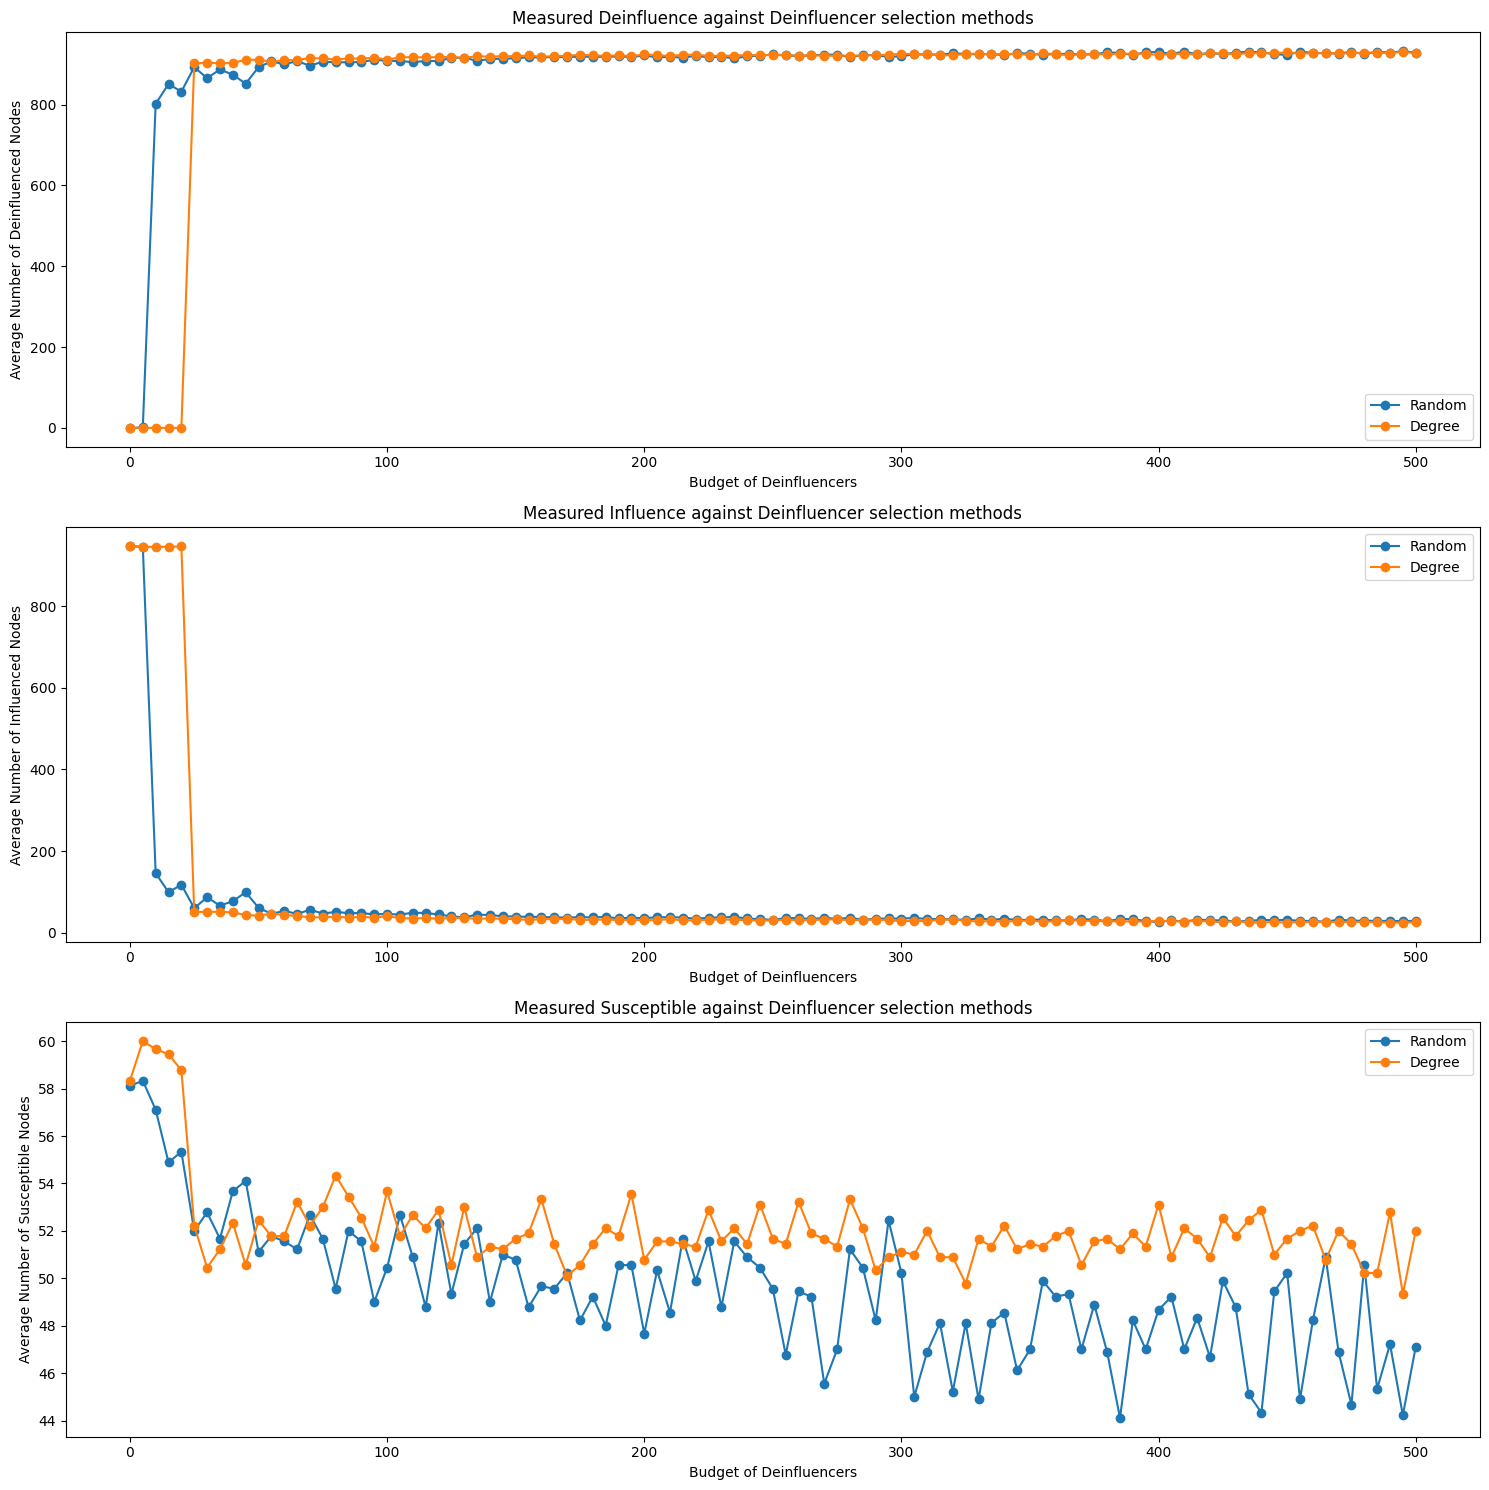

In [7]:

# Plotting results
fig, axs = plt.subplots(3, figsize=(15, 15))
axs[0].set_title('Measured Deinfluence against Deinfluencer selection methods')
axs[1].set_title('Measured Influence against Deinfluencer selection methods')
axs[2].set_title('Measured Susceptible against Deinfluencer selection methods')

# Create line plots
methods = results[next(iter(results))].keys()  # Get all methods from the first key
k_values = sorted(results.keys())  # Sort k values for plotting
total_nodes = len(G.nodes)

for method in methods:
    deinfluenced_nodes = [results[k][method][0] for k in k_values]
    influenced_nodes = [results[k][method][1] for k in k_values]
    susceptible_nodes = [total_nodes - (influenced + deinfluenced) for influenced, deinfluenced in zip(influenced_nodes, deinfluenced_nodes)]

    axs[0].plot(k_values, deinfluenced_nodes, label=method, marker="o")
    axs[1].plot(k_values, influenced_nodes, label=method, marker="o")
    axs[2].plot(k_values, susceptible_nodes, label=method, marker="o")

axs[0].legend()
axs[0].set_xlabel('Budget of Deinfluencers')
axs[0].set_ylabel('Average Number of Deinfluenced Nodes')

axs[1].legend()
axs[1].set_xlabel('Budget of Deinfluencers')
axs[1].set_ylabel('Average Number of Influenced Nodes')

axs[2].legend()
axs[2].set_xlabel('Budget of Deinfluencers')
axs[2].set_ylabel('Average Number of Susceptible Nodes')

plt.tight_layout()
plt.show()